<a href="https://colab.research.google.com/github/SaniyaPathre/Stock-Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


data = pd.read_csv('/content/TSLA.csv')



Epoch 1/50
30/30 [==============================] - 2s 20ms/step - loss: 0.0384
Epoch 2/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0257
Epoch 3/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0252
Epoch 4/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0248
Epoch 5/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0243
Epoch 6/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0237
Epoch 7/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0227
Epoch 8/50
30/30 [==============================] - 0s 14ms/step - loss: 0.0216
Epoch 9/50
30/30 [==============================] - 0s 14ms/step - loss: 0.0195
Epoch 10/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0165
Epoch 11/50
30/30 [==============================] - 0s 14ms/step - loss: 0.0158
Epoch 12/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0155
Epoch 13/50
30/30 [==================

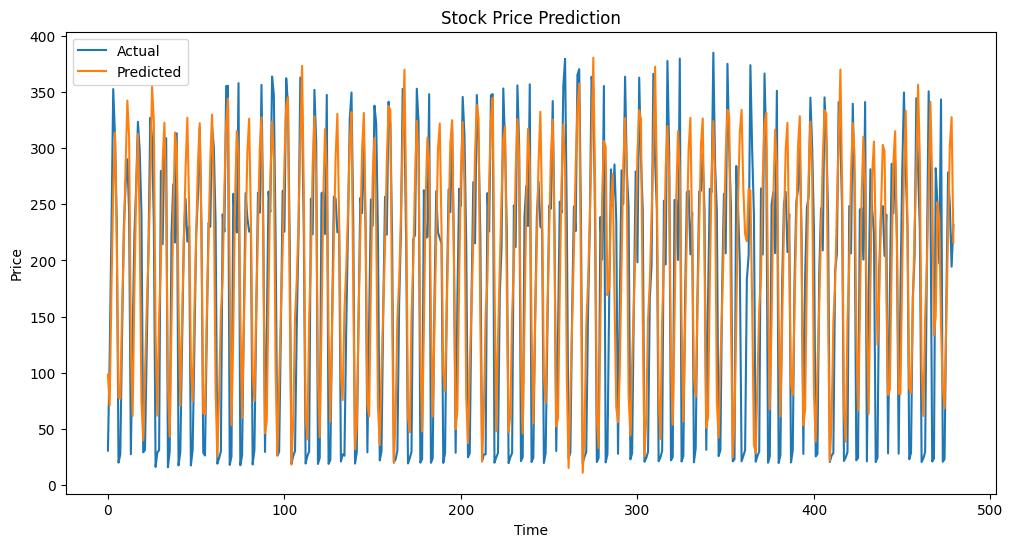

In [ ]:

# Display the first few rows of the dataset
data.head()

# Sort the data by date
data = data.sort_values('Date')

# Use only the 'Close' column for prediction
data = data[['Close']]

# Convert the data to numpy array
dataset = data.values

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

# Define a function to create sequences of data for training the LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set the sequence length (number of previous days to consider for prediction)
seq_length = 20

# Create sequences of data
X, y = create_sequences(dataset, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()